In [11]:
from api_caller import call_api
from public_data.api_caller import save_data
import pandas as pd
import os
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

os.chdir(os.getcwd())
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [2]:
df = pd.read_json('auction_price_onion_2020_2021.json')

In [3]:
df['delngDe'] = pd.to_datetime(df['delngDe'], format='%Y%m%d')
df = df.sort_values(['delngDe'], ascending=[1])
df = df.rename({'aucSeCode':'경매구분코드','aucSeNm':'경매구분코드명','catgoryNm':'부류명','cprInsttCode':'도매시장법인코드','cprMtcCode':'산지코드','prUsePrdlstCode':'법인사용품목코드','cprUsePrdlstNm':'법인사용품목명','delngDe':'경락일자',' delngPrut':'거래단위량','delngQy':'거래량','insttNm':'도매시장법인명','ledgNo':'경매원표번호','rnum':'한페이지결과수','sbidPric':'거래가격','shipmntSeCode':'출하구분코드','shipmntSeNm':'출하구분명','sleSeqn':'일련번호','stdFrmlcNewCode':'포장상태코드','stdFrmlcNewNm':'포장상태명','stdMtcNewNm':'산지명',' stdPrdlstCode':'품목코드','stdPrdlstNm':'품목명','stdSpciesCode':'품종코드','stdSpciesNm':'품종명','stdQlityNewCode':'등급코드','stdQlityNewNm':'등급명','stdUnitNewCode':'거래규격단위코드','stdUnitNewNm':'거래단위명','whsalMrktCode':'도매시장코드','whsalMrktNm':'도매시장명','cprMtcNm':'산지명2','sbidTime':'경매시간'}, axis='columns')


In [4]:
df

,경매구분코드,경매구분코드명,catgoryCode,catgoryNewCode,catgoryNewNm,부류명,도매시장법인코드,cprInsttNewCode,산지코드,산지명2,경락일자,delngPrut,거래량,insttNewNm,도매시장법인명,경매원표번호,한페이지결과수,거래가격,경매시간,일련번호,포장상태코드,포장상태명,stdMgNewCode,stdMgNewNm,stdMtcNewCode,산지명,stdPrdlstCode,stdPrdlstNewCode,stdPrdlstNewNm,품목명,등급코드,등급명,품종코드,stdSpciesNewCode,stdSpciesNewNm,품종명,거래규격단위코드,거래단위명,도매시장코드,whsalMrktNewCode,whsalMrktNewNm,도매시장명,cprUsePrdlstCode,법인사용품목명,출하구분코드,출하구분명
275112,1,경매,12,12,조미채소류,조미채소류,38010102,6051105,641465,NaN,2020-01-02,1.1,106,농협창원(공),농협창원(공),000000000000107,289,1850,NaN,00020,1ZZ,기타,1ZZ,기타,51100,경상남도 창원시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,5201,대파,2.0,계통
275085,1,경매,12,12,조미채소류,조미채소류,38010102,6051105,641465,NaN,2020-01-02,1.2,100,농협창원(공),농협창원(공),000000000000101,262,1750,NaN,00010,1ZZ,기타,1ZZ,기타,51100,경상남도 창원시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,5201,대파,2.0,계통
275084,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,261,1900,2020-01-02 05:14:27,00005,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275083,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,260,1900,2020-01-02 05:14:21,00004,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275082,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,259,1850,2020-01-02 05:14:17,00003,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275081,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,258,1800,2020-01-02 05:14:13,00002,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275080,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,257,1700,2020-01-02 05:14:08,00001,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275079,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,539804,NaN,2020-01-02,1.2,40,창원청과,창원청과,2203,256,1100,2020-01-02 05:10:47,00004,1ZZ,기타,102,2,58900,전라남도 진도군,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275078,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,539804,NaN,2020-01-02,1.2,75,창원청과,창원청과,2203,255,1650,2020-01-02 05:10:38,00003,1ZZ,기타,1ZZ,기타,58900,전라남도 진도군,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
df.columns

df = df[['경락일자', '거래량', '거래가격','거래규격단위코드', '거래단위명', '등급명']]

In [6]:
df

,경락일자,거래량,거래가격,거래규격단위코드,거래단위명,등급명
275112,2020-01-02,106,1850,12,kg,특
275085,2020-01-02,100,1750,12,kg,특
275084,2020-01-02,100,1900,12,kg,특
275083,2020-01-02,100,1900,12,kg,특
275082,2020-01-02,100,1850,12,kg,특
275081,2020-01-02,100,1800,12,kg,특
275080,2020-01-02,100,1700,12,kg,특
275079,2020-01-02,40,1100,12,kg,특
275078,2020-01-02,75,1650,12,kg,특
...,...,...,...,...,...,...


<AxesSubplot:xlabel='경락일자'>

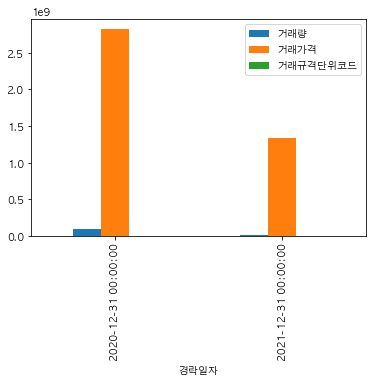

In [7]:
rc('font', family='AppleGothic')
df = df.set_index('경락일자')
gr = df.groupby(pd.Grouper(freq='Y'))
gr.sum().plot(kind='bar')

<AxesSubplot:xlabel='경락일자'>

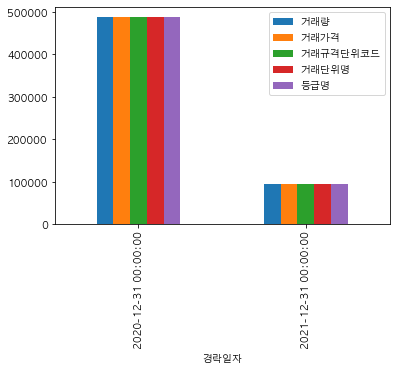

In [8]:
gr.count().plot(kind='bar')

In [9]:
gr.count()

,거래량,거래가격,거래규격단위코드,거래단위명,등급명
경락일자,,,,,
2020-12-31,488158,488158,488158,488158,488158
2021-12-31,94491,94491,94491,94491,94491


<BarContainer object of 2 artists>

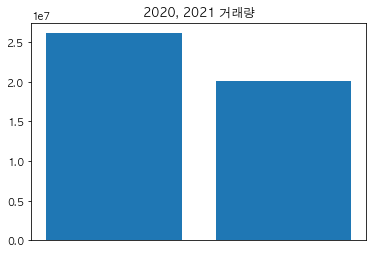

In [19]:
df2020 = df.loc['2020-01-01':'2020-03-31']
df2021 = df.loc['2021-01-01':'2021-03-31']

y = [int(df2020['거래량'].sum()),
 int(df2021['거래량'].sum())]
x = [2020, 2021]

plt.title('2020, 2021 거래량')
plt.xticks([2020, 2021], labels=['2020.1to3', '2021.1to3'])
plt.bar(x, y)